In [134]:
def quad_swap(val):
    # Создаем временный список для хранения отсортированных значений
    tmp = [0, 0, 0, 0]

    # Сортируем первые два элемента
    if val[0] > val[1]:
        tmp[0] = val[1]
        tmp[1] = val[0]
    else:
        tmp[0] = val[0]
        tmp[1] = val[1]

    # Сортируем последние два элемента
    if val[2] > val[3]:
        tmp[2] = val[3]
        tmp[3] = val[2]
    else:
        tmp[2] = val[2]
        tmp[3] = val[3]

    # Переставляем элементы в val в правильном порядке
    if tmp[1] <= tmp[2]:
        val[0], val[1], val[2], val[3] = tmp[0], tmp[1], tmp[2], tmp[3]
    elif tmp[0] > tmp[3]:
        val[0], val[1], val[2], val[3] = tmp[2], tmp[3], tmp[0], tmp[1]
    else:
        if tmp[0] <= tmp[2]:
            val[0], val[1] = tmp[0], tmp[2]
        else:
            val[0], val[1] = tmp[2], tmp[0]

        if tmp[1] <= tmp[3]:
            val[2], val[3] = tmp[1], tmp[3]
        else:
            val[2], val[3] = tmp[3], tmp[1]

    # Возвращаем отсортированный список
    return val

In [135]:
def quad_merge(arr1, arr2, arr3, arr4):
    # Создаем результативный список нужной длины
    result = [0] * (len(arr1) + len(arr2) + len(arr3) + len(arr4))
    i = j = k = l = 0

    # Пока есть элементы в хотя бы одном из блоков
    while i < len(arr1) or j < len(arr2) or k < len(arr3) or l < len(arr4):
        # Инициализируем значения блоков как бесконечность
        val = [float('inf')] * 4

        # Заполняем значения, если они доступны
        if i < len(arr1):
            val[0] = arr1[i]
        if j < len(arr2):
            val[1] = arr2[j]
        if k < len(arr3):
            val[2] = arr3[k]
        if l < len(arr4):
            val[3] = arr4[l]

        # Ищем минимальное значение
        min_val = min(val)

        # Помещаем минимальное значение в результат
        result[i + j + k + l] = min_val

        # Переходим к следующему элементу в массиве с минимальным значением
        if i < len(arr1) and min_val == arr1[i]:
            i += 1
        elif j < len(arr2) and min_val == arr2[j]:
            j += 1
        elif k < len(arr3) and min_val == arr3[k]:
            k += 1
        else:
            l += 1

    # Возвращаем отсортированный результат
    return result

In [136]:
def bin_marge(arr1, arr2):
    # Создаем результативный список нужной длины
    result = [0] * (len(arr1) + len(arr2))
    i = j = k = 0

    # Пока есть элементы в обоих массивах
    while i < len(arr1) and j < len(arr2):
        # Выбираем минимальный элемент из двух массивов
        if arr1[i] < arr2[j]:
            result[k] = arr1[i]
            i += 1
        else:
            result[k] = arr2[j]
            j += 1
        k += 1

    # Добавляем оставшиеся элементы из обоих массивов
    while i < len(arr1):
        result[k] = arr1[i]
        i += 1
        k += 1

    while j < len(arr2):
        result[k] = arr2[j]
        j += 1
        k += 1

    # Возвращаем отсортированный результат
    return result

In [137]:
def insertion_sort(arr):
    # Сортировка вставками
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    # Возвращаем отсортированный список
    return arr

In [138]:
def quad_sort(arr, optimal_block_size=4):
    # Получаем размер входного массива
    n = len(arr)

    # Если массив достаточно маленький, используем сортировку вставками
    if n <= optimal_block_size:
        insertion_sort(arr)
        return arr

    else:
        # Разбиваем на четырехэлементные блоки и применяем quad_swap
        blocks = []
        for i in range(0, n - n % optimal_block_size, optimal_block_size):
            blocks.append(quad_swap(arr[i:i + optimal_block_size]))

        # Обрабатываем хвост (оставшиеся элементы)
        tail = []
        if n % optimal_block_size != 0:
            tail.extend(arr[n - n % optimal_block_size : n])
        if len(tail) > 1:
            insertion_sort(tail)

        # Итерируем, пока есть больше 3 блоков
        i = 0
        while len(blocks) > 3:
            if blocks[i][-1] <= blocks[i+1][0] and blocks[i+1][-1] <= blocks[i+2][0] and blocks[i+2][-1] <= blocks[i+3][0]:
                blocks[i].extend(blocks[i + 1] + blocks[i + 2] + blocks[i + 3])
                [blocks.pop(i+1) for _ in range(3)]
            elif blocks[i+3][-1] <= blocks[i+2][0] and blocks[i+2][-1] <= blocks[i+1][0] and blocks[i+1][-1] <= blocks[i][0]:
                blocks[i + 3].extend(blocks[i + 2] + blocks[i + 1] + blocks[i])
                [blocks.pop(i) for _ in range(3)]
            else:
                blocks.extend([quad_merge(blocks[i], blocks[i + 1], blocks[i + 2], blocks[i + 3])])
                [blocks.pop(i) for _ in range(4)]
            i += 1
            if len(blocks) - i < 4:
                i = 0

        # Обрабатываем оставшиеся блоки
        if len(blocks) > 1:
            while len(blocks) > 1:
                blocks.extend([bin_marge(blocks[0], blocks[1])])
                [blocks.pop(0) for _ in range(2)]

        # Объединяем хвост, если он есть
        arr = blocks[0]
        if len(tail) > 0:
            arr = bin_marge(arr, tail)

    # Возвращаем окончательный отсортированный результат
    return arr

In [139]:
# Пример использования:
values = [5, 18, 1, 10, 13, 6, 8, 3, 17, 15, 4, 9, 12, 11, 16, 14, 7, 2]
print(quad_sort(values))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [140]:
import time
from decimal import Decimal
from random import randint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array, log

In [143]:
import sys
sys.setrecursionlimit(10000000)

graph_val_1 = {}
graph_val_2 = {}
graph_val_3 = {}
graph_val_4 = {}

for i in range(4000, 240000 , 20000):
    array_len = i
    sorted_array = [i for i in range(array_len)]
    almost_sorted_array = [i for i in range(array_len)]
    for _ in range(int(array_len**0.5)):
        i = randint(0, array_len-1)
        j = randint(0, array_len-1)
        almost_sorted_array[i], almost_sorted_array[j] = almost_sorted_array[j], almost_sorted_array[i]
    reverse_sorted_array = [i for i in range(array_len-1, -1, -1)]
    random_array = [randint(1, 10000) for _ in range(array_len)]
    
    start = time.time()
    quad_sort(sorted_array)
    end = time.time()
    graph_val_1.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    quad_sort(almost_sorted_array)
    end = time.time()
    graph_val_2.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    quad_sort(reverse_sorted_array)
    end = time.time()
    graph_val_3.update({array_len: Decimal(end)-Decimal(start)})
    
    start = time.time()
    quad_sort(random_array)
    end = time.time()
    graph_val_4.update({array_len: Decimal(end)-Decimal(start)})

1.7346151829157389e-06x + -0.0042187346580090145
4.1634456246315027e-07xlog(x) + 0.018476121329943952
4.7643640586811124e-07x + 0.1763057785114479
1.2659909670785072e-06xlog(x) + -0.030137990179319854


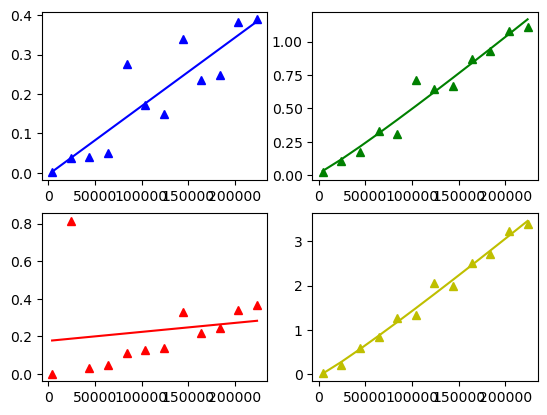

In [146]:
def mapping2(x, a, b,):
    return a * x + b
def mapping3(x, a, c):
    return a * x * log(x) + c

fig, axs = plt.subplots(nrows=2, ncols=2)

args, _ = curve_fit(mapping2, array(list(graph_val_1.keys())), array(list(graph_val_1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_1.keys())) + c

print(a, 'x + ', c, sep='')
axs[0, 0].plot(array(list(graph_val_1.keys())), y_fit, 'b')
axs[0, 0].plot(graph_val_1.keys(), graph_val_1.values(), 'b^')

args, _ = curve_fit(mapping3, array(list(graph_val_2.keys())), array(list(graph_val_2.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_2.keys())) * log(array(list(graph_val_2.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
axs[0, 1].plot(array(list(graph_val_1.keys())), y_fit, 'g')
axs[0, 1].plot(graph_val_2.keys(), graph_val_2.values(), 'g^')

args, _ = curve_fit(mapping2, array(list(graph_val_3.keys())), array(list(graph_val_3.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_3.keys())) + c

print(a, 'x + ', c, sep='')
axs[1, 0].plot(array(list(graph_val_3.keys())), y_fit, 'r')
axs[1, 0].plot(graph_val_3.keys(), graph_val_3.values(), 'r^')

args, _ = curve_fit(mapping3, array(list(graph_val_4.keys())), array(list(graph_val_4.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val_4.keys())) * log(array(list(graph_val_4.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
axs[1, 1].plot(array(list(graph_val_4.keys())), y_fit, 'y')
axs[1, 1].plot(graph_val_4.keys(), graph_val_4.values(), 'y^')